01. Data Extraction

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

link = 'amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(link)
df = data.copy()

In [ ]:
df.isnull().sum()


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [15]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
round(df.describe())

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.0,2443651.0,2443651.0,2443651.0,2443651.0
mean,1370545.0,2.0,481.0,89.0,26.0
std,816056.0,2.0,5944.0,346.0,240.0
min,1.0,0.0,0.0,0.0,0.0
25%,658922.0,0.0,0.0,10.0,0.0
50%,1349029.0,0.0,0.0,19.0,0.0
75%,2060686.0,4.0,59.0,46.0,0.0
max,2828593.0,5.0,1356658.0,100000.0,50000.0


In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [104]:
#Frequency table
frequency_table_category = df['category'].value_counts()
frequency_table_category


category
Sports & Outdoors                                   836265
Beauty                                               19312
Handmade Clothing, Shoes & Accessories               19229
Bath & Body                                          19092
Birthday Gifts                                       18978
Manicure & Pedicure Products                         18940
Skin Care                                            18769
Make-up                                              18756
Hair Care                                            18735
Fragrances                                           18564
Handmade Gifts                                       18295
Handmade Home Décor                                  18146
Luggage and travel gear                              18142
Handmade Jewellery                                   18044
Handmade Artwork                                     17878
Women                                                17772
Handmade Home & Kitchen Products               

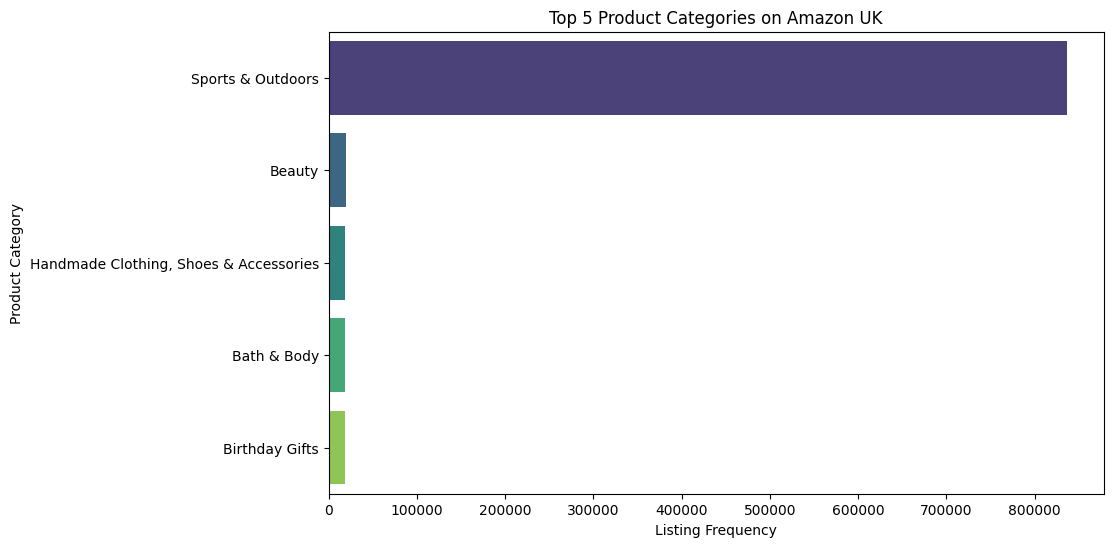

In [19]:
#Product Distribution across top categories

# top_5_categories
top_5_categories = frequency_table_category = df['category'].value_counts().head()
top_5_categories



# visualization of the top 5 categories

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_5_categories.values,
    y=top_5_categories.index,
    hue=top_5_categories.index,
    palette='viridis',
    legend=False
)

plt.title('Top 5 Product Categories on Amazon UK')
plt.xlabel('Listing Frequency')
plt.ylabel('Product Category')

plt.show()


In [20]:
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

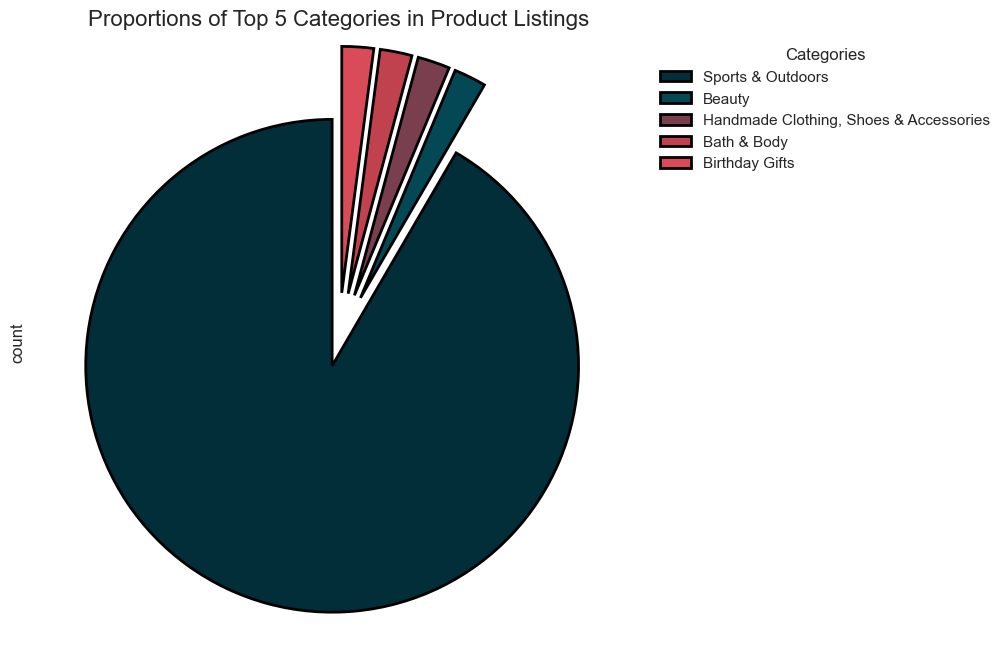

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


top_5_categories = df['category'].value_counts().head()
top_5_categories = top_5_categories / top_5_categories.sum()
colors = ['#022e39', '#044855', '#793f4e', '#c0424e', '#d94b58']
sns.set_theme(style="whitegrid")  # Clean and grid-like background


plt.figure(figsize=(10, 8))


explode = (0.1, 0.2, 0.2, 0.2, 0.2)


ax = top_5_categories.plot(kind='pie', labels=None, startangle=90, 
                        colors=colors, explode=explode, 
                        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': 'solid'})


plt.title("Proportions of Top 5 Categories in Product Listings", fontsize=16)
plt.legend(top_5_categories.index, title="Categories", loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.show()



### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [ ]:
""" **Measures of Centrality**:
- Calculate the mean, median, and mode for the `price` of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?"""
# the mode is lower than the mean and the average
mean_product_price = round(df['price'].mean())
median_product_price = round(df['price'].median())
mode_product_price = round(df['price'].mode())


print(mean_product_price)
print(median_product_price)
print(mode_product_price)


89
19
0    10.0
Name: price, dtype: float64


In [ ]:
"""**Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?"""

statitics_product_price = round(df['price'].describe().T)
statitics_product_price



count    2443651.0
mean          89.0
std          346.0
min            0.0
25%           10.0
50%           19.0
75%           46.0
max       100000.0
Name: price, dtype: float64

In [81]:
round(df['price'].var())

119445

In [83]:
round(df['price'].std())

346

In [85]:
Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75) 
IQR = Q3 - Q1

print(f"Interquartile Range (IQR): {IQR}")



min_price = df['price'].min()
max_price = df['price'].max()


price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")



Interquartile Range (IQR): 36.0
Minimum Price: 0.0
Maximum Price: 100000.0
Price Range: 100000.0


In [96]:
# Verifique os valores únicos e a distribuição dos dados

print(df['price'].isna().sum())  # Número de valores nulos


0


In [ ]:
# Para adicionar uma linha de regressão ao gráfico
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y=df['price'], scatter=False, color='red', line_kws={'lw': 2})
plt.title('Price Distribution with Trend Line')
plt.show()


